# The Probability Density Function (PDF) - Lab

## Introduction

In this lab we will look at building visualizations known as **density plots** to estimate the probability density for a given set of data. 

## Objectives

You will be able to: 

* Calculate the PDF from given dataset containing real valued random variables
* Plot density functions and comment on the shape of the plot
* Plot density functions using seaborn


## Let's get started!

We'll import all the required libraries for you for this lab.

In [1]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pandas as pd 

#### Import the dataset 'weight-height.csv' as pandas dataframe . Calculate the mean and standard deviation for weights and heights for male and female individually. 

Hint : Use your pandas dataframe subsetting skills like loc(), iloc() and groupby()

In [4]:
data = pd.read_csv('weight-height.csv')
data.columns
data.head()


,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [27]:
# separate male and female dfs
male_df = data[data.Gender=='Male']
female_df =  data[data.Gender=='Female']

male_height_mean = male_df.Height.mean()
male_height_std = male_df.Height.std()
male_weight_mean = male_df.Weight.mean()
male_weight_std = male_df.Weight.std()

female_height_mean = female_df.Height.mean()
female_height_std = female_df.Height.std()
female_weight_mean = female_df.Weight.mean()
female_weight_std = female_df.Weight.std()

  

# Male Height mean: 69.02634590621737
# Male Height sd: 2.8633622286606517
# Male Weight mean: 187.0206206581929
# Male Weight sd: 19.781154516763813
# Female Height mean: 63.708773603424916
# Female Height sd: 2.696284015765056
# Female Weight mean: 135.8600930074687
# Female Weight sd: 19.022467805319007

#### Plot overlapping normalized histograms for male and female heights - use binsize = 10, set alpha level so that overlap can be visualized

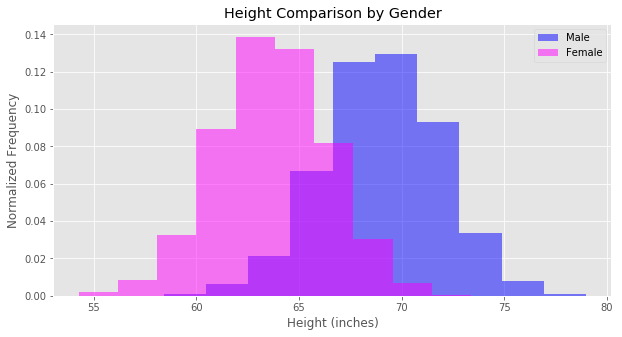

In [49]:
fig = plt.figure(figsize=(10,5))
plt.hist(male_df.Height, density = True, color='blue', alpha=0.5, bins=10, label='Male')
plt.hist(female_df.Height, density= True, color='magenta',alpha=0.5, bins=10, label = 'Female')
plt.ylabel('Normalized Frequency')
plt.xlabel('Height (inches)')
plt.title('Height Comparison by Gender')
plt.legend()

In [ ]:
# Record your observations - are these inline with your personal observations?

# The average male is taller than the average female. Makes sense.


#### Write a function density() that takes in a random variable and calculates the density function using `np.hist` and interpolation. The function should return two lists carrying x and y coordinates for plotting the density function

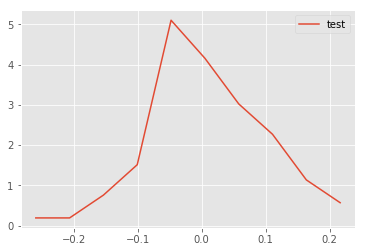

In [48]:
def density(s):
    n, bins = np.histogram(s, density=1)
    
    pdfx = np.zeros(n.size)
    pdfy = np.zeros(n.size)

    for k in range(n.size):
        pdfx[k] = 0.5*(bins[k]+bins[k+1])
        pdfy[k] = n[k]
    return pdfx, pdfy

# Generate test data and test the function - uncomment to run the test
np.random.seed(5)
mu, sigma = 0, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, 100)
x,y = density(s)
plt.plot(x,y, label = 'test')
plt.legend()

#### Add Overlapping density plots for male and female heights to the histograms plotted earlier

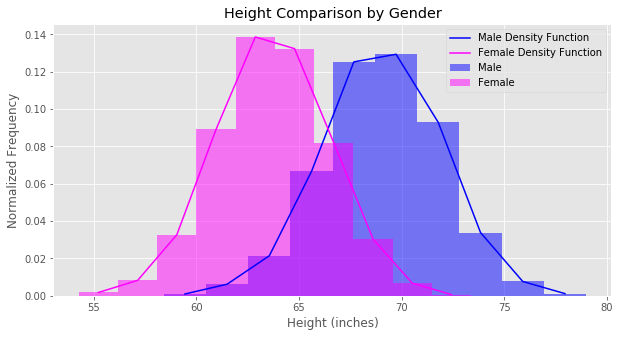

In [63]:
fig = plt.figure(figsize=(10,5))
plt.hist(male_df.Height, density = True, color='blue', alpha=0.5, bins=10, label='Male')
plt.hist(female_df.Height, density= True, color='magenta',alpha=0.5, bins=10, label = 'Female')
plt.ylabel('Normalized Frequency')
plt.xlabel('Height (inches)')
plt.title('Height Comparison by Gender')

pdf_male = density(male_df.Height)
pdf_female = density(female_df.Height)
plt.plot(pdf_male[0],pdf_male[1], color = 'blue', label = 'Male Density Function')
plt.plot(pdf_female[0],pdf_female[1], color = 'magenta', label = 'Female Density Function')

plt.legend()


#### Repeat above exerice for male and female weights

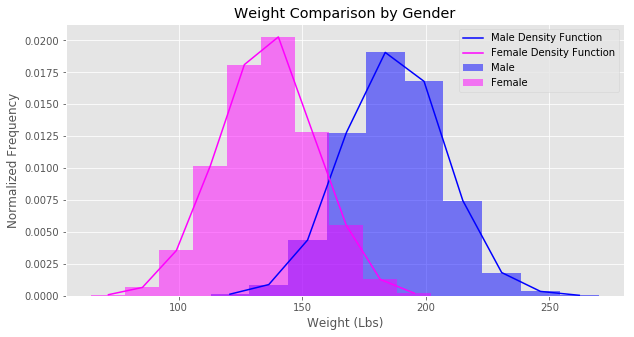

In [65]:
# Your code here 
fig = plt.figure(figsize=(10,5))
plt.hist(male_df.Weight, density = True, color='blue', alpha=0.5, bins=10, label='Male')
plt.hist(female_df.Weight, density= True, color='magenta',alpha=0.5, bins=10, label = 'Female')
plt.ylabel('Normalized Frequency')
plt.xlabel('Weight (Lbs)')
plt.title('Weight Comparison by Gender')

pdf_male = density(male_df.Weight)
pdf_female = density(female_df.Weight)
plt.plot(pdf_male[0],pdf_male[1], color = 'blue', label = 'Male Density Function')
plt.plot(pdf_female[0],pdf_female[1], color = 'magenta', label = 'Female Density Function')

plt.legend()


#### Write your observations in the cell below.

In [68]:
# Record your observations - are these inline with your personal observations?
'''On average, the average male weights more than the average female.'''

# So whats the takeaway when comparing male and female heights and weights 
'''On average, the average male is taller and heavier than the average female.
There is a correlation between height and weight.'''


#### Repeat Above experiments in seaborn and compare with your results. 

/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Height Comparison by Gender')

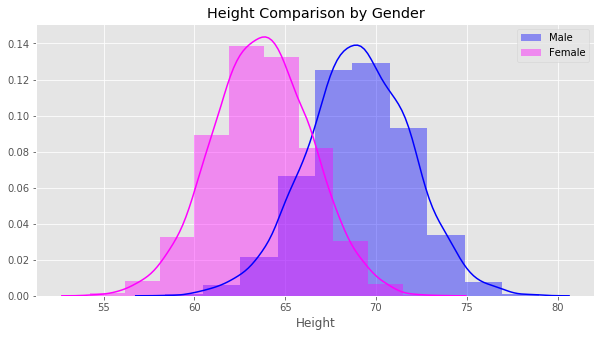

In [73]:
import seaborn as sns 




/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Weight Comparison by Gender')

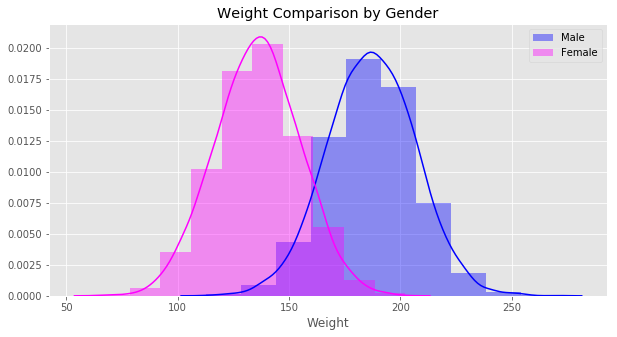

In [74]:
fig = plt.figure(figsize=(10,5))
sns.distplot(male_df.Weight, hist = True, color='blue', bins=10, label='Male')
sns.distplot(female_df.Weight, hist = True, color='magenta', bins=10,label='Female')
plt.legend()
plt.title('Weight Comparison by Gender')

In [75]:
# Your comments on the two approaches here. 
# are they similar ? what makes them different if they are ?

'''It was a lot more efficient using seaborn'''

'It was a lot more efficient using seaborn'

## Summary

In this lesson we saw how to build the probability density curves visually for given datasets and compare on the distribution visually by looking at the spread , center and overlap between data elements. This is a useful EDA technique and can be used to answer some initial questions before embarking on a complex analytics journey.